TypeError: 'Axes' object is not subscriptable

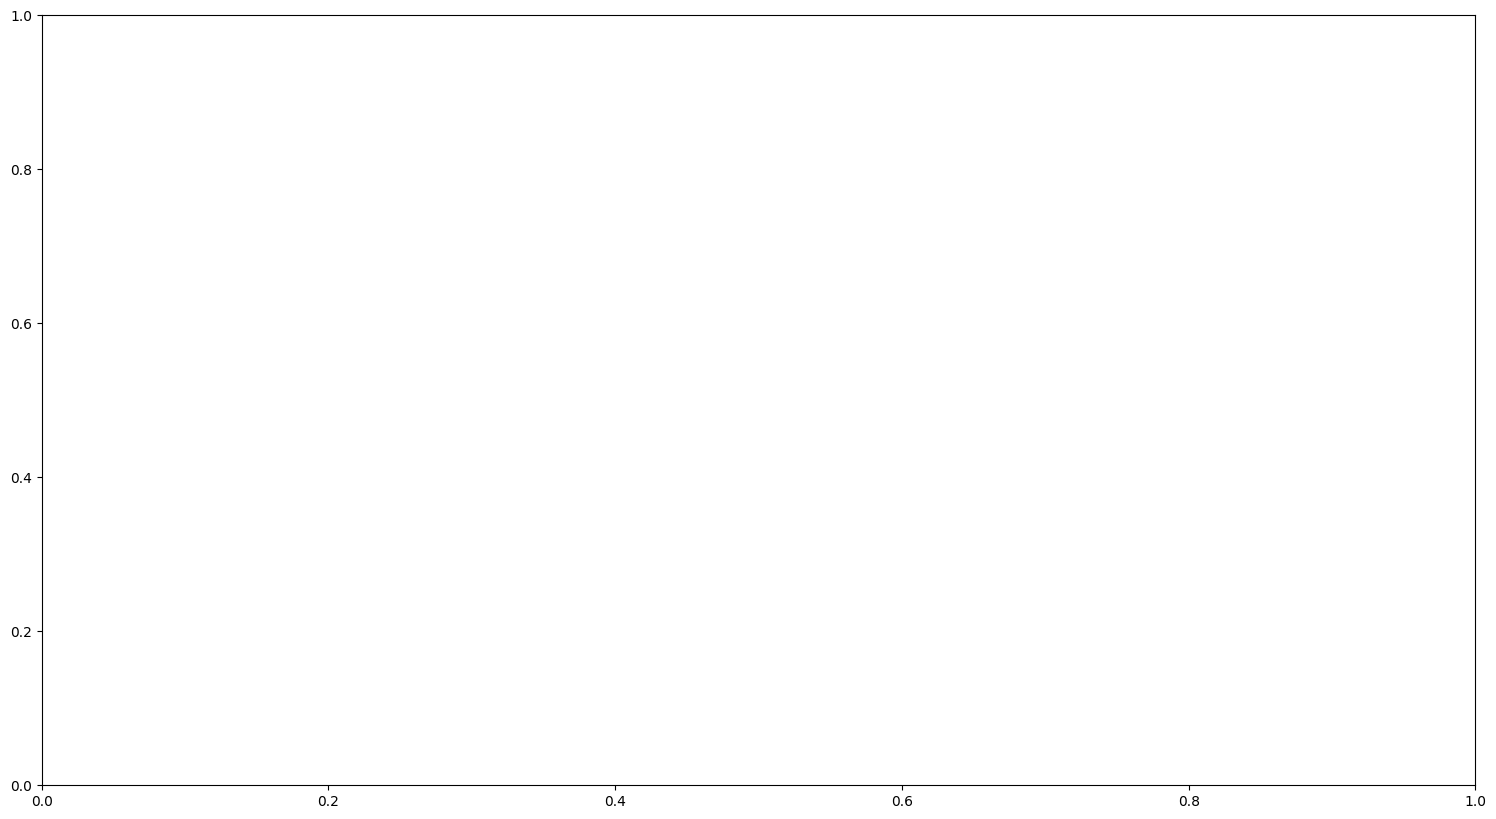

In [1]:
import json
import matplotlib.pyplot as plt

colors = {
    'cuckoo'         : 'g',
    'tbb'            : 'b',
    'cuckoo_seqlock' : 'y',
}

def draw_plot(json_out):
    stats = {}

    for benchmark in json_out['benchmarks']:
        splitted_name = benchmark['name'].split('/')
        splitted_first = splitted_name[0].split('-')

        benchmark_name = splitted_first[0]
        map_name = splitted_first[1]

        threads = int(splitted_name[1])
        scenario_size = int(splitted_name[3])
        scenarious_generator = int(splitted_name[-4])

        operations_amount = scenario_size * threads if scenarious_generator == 0 else scenario_size

        key = int(splitted_name[1])

        if benchmark_name in stats:
            if map_name in stats[benchmark_name]:
                stats[benchmark_name][map_name].append((key, operations_amount / benchmark['real_time']))
            else:
                stats[benchmark_name][map_name] = [(key, operations_amount / benchmark['real_time'])]
        else:
            stats[benchmark_name] = {map_name : [(key, operations_amount / benchmark['real_time'])]}

    fig, axs = plt.subplots(nrows=len(stats))
    fig.set_size_inches(18.5, len(stats), forward=True)
    fig.set_dpi(100)

    plot_num = 0
    for benchmark_name, map_to_array in stats.items():
        axs[plot_num].plot([], [])
        axs[plot_num].set_xlabel('threads')
        axs[plot_num].set_ylabel('op/ms')

        for map_name, array in map_to_array.items():
            x = []
            y = []
            for (threads, real_time) in array:
                x.append(threads)
                y.append(real_time)

            axs[plot_num].plot(x, y, color=colors[map_name], label=map_name)
            axs[plot_num].legend()
        
        axs[plot_num].set_title(benchmark_name)
        plot_num += 1
    plt.savefig('bench_plot.png')

def main():
    with open('bench_out.json', 'r') as data:
        draw_plot(json.load(data))

main()